In [6]:
from matplotlib import pyplot as plt
import numpy as np 

In [13]:
# This is my network, the explanation of my process of getting this is in the document.

problem1_network = [
    [{'weights': [-3.0, 1.0, -3.0] },
     {'weights': [-3.0, 1.0, -2.5]}, 
     {'weights': [3.0, 1.0, -3.0]},
     {'weights': [3.0, 1.0, -2.5]}, 
     {'weights': [0.0, 1.0, 1.0]},
    {'weights': [0.0, 1.0, 1.25]}], 
                                 [{'weights': [-1.0, 1.0, -1.0, 0.0, -1.0, 1.0, -2.0]},
                                 {'weights': [-1.0, 0.0, -1.0, 1.0, -1.0, 1.0, -2.0]},
                                 {'weights': [-1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0]}], [{'weights': [1.0, 1.0, 1.0, 0.0]}]]  

# I have a made a mesh grid to give as an input to my network and that's how I get the A plot.                         
x = np.arange(-3, 3, 0.05)
y = np.arange(-3, 3, 0.05)

xx, yy = np.meshgrid(x, y)



In [8]:
def forward_propagate(network,data,activation_func = "Sigmoid"):
    # This function handles the complete forward propagation of network for one set of data points.

    for layer in network:
        layer_output = []
        for node in layer:
            node_output = single_forward_pass(node['weights'],data,activation_func)
            node['Output'] = node_output
            
            layer_output.append(node_output)
        data = layer_output

    return data

def single_forward_pass(node,data,activation_func):
    # This function is to calculate final output of a single neuron

    weighted_sum = node[-1]
    for w,x in zip(node[:-1],data):
        weighted_sum += w*x
    layer_output = signum_activation_function(weighted_sum)
    return layer_output

# The function below is for signum units.
def signum_activation_function(weighted_sum):
    if weighted_sum>=0:
        return 1.0
    elif weighted_sum<0:
        return -1.0 

# The function below is called everytime we have to make a prediction using a pretrained network.
def predict(network, input_data):
    output_val = forward_propagate(network, input_data)
    return output_val[0]

# The function below is for the single hidden layer of problem 1:
def single_hidden_layer_activation_function(weighted_sum):
    if weighted_sum>=0:
        return 1.0
    elif weighted_sum<0:
        return 0.0 

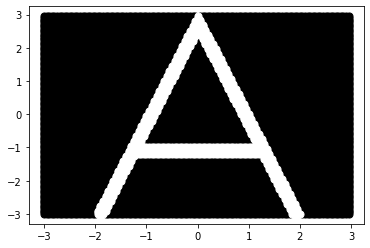

In [14]:
class1_data=[[],[]]
class0_data=[[],[]]

for row,col in zip(xx,yy):
    for x_val,y_val in zip(row,col):
        z = predict(problem1_network, [x_val,y_val])
        if z==1:
            class1_data[0].append(x_val)
            class1_data[1].append(y_val)
        else:
            class0_data[0].append(x_val)
            class0_data[1].append(y_val)

        
plt.scatter(class0_data[0],class0_data[1],marker = '.',s=200.0,c='k',label='Class 0')
plt.scatter(class1_data[0],class1_data[1],marker = '.',s=200.0,c='w',label='Class 1')


plt.show()
# plt.savefig("A_plot")

In [10]:
#These are the functions for the single hidden layer part of the problem. I just have a different activation function here, rest is same.

def single_hidden_layer_forward_propagate(network,data,activation_func = "Sigmoid"):
    # This function handles the complete forward propagation of network for one set of data points.

    for layer in network:
        layer_output = []
        for node in layer:
            node_output = single_hidden_layer_single_forward_pass(node['weights'],data,activation_func)
            node['Output'] = node_output
            
            layer_output.append(node_output)
        data = layer_output

    return data

def single_hidden_layer_activation_function(node,data,activation_func):
    # This function is to calculate final output of a single neuron

    weighted_sum = node[-1]
    for w,x in zip(node[:-1],data):
        weighted_sum += w*x
    layer_output = signum_activation_function(weighted_sum)
    return layer_output

# The function below is for the single hidden layer of problem 1:
def single_hidden_layer_activation_function(weighted_sum):
    if weighted_sum>=0:
        return 1.0
    elif weighted_sum<0:
        return 0.0 
def single_hidden_layer_predict(network, input_data):
    output_val = single_hidden_layer_forward_propagate(network, input_data)
    return output_val[0]

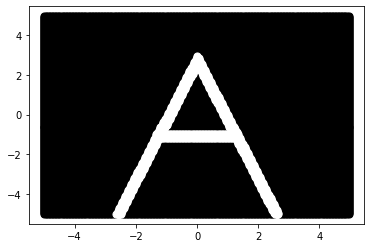

In [12]:
x_value = 5.0
x_neg_value = -5.0
y_value = 5.0
y_neg_value = -5.0
x = np.arange(x_neg_value, x_value, 0.05)
y = np.arange(y_neg_value, y_value, 0.05)


single_layer_problem1_network = [
    [{'weights': [-3.0, 1.0, -3.0] },
     {'weights': [-3.0, 1.0, -2.5]}, 
     {'weights': [3.0, 1.0, -3.0]},
     {'weights': [3.0, 1.0, -2.5]}, 
     {'weights': [0.0, 1.0, 1.0]},
    {'weights': [0.0, 1.0, 1.25]},
    {'weights': [1.0, 0.0, 1.39]},
    {'weights': [1.0, 0.0, x_value]},
    {'weights': [1.0, 0.0, -1.39]},
    {'weights': [1.0, 0.0, x_neg_value]},
    {'weights': [0.0, 1.0, y_neg_value]},
    {'weights': [0.0, 1.0, -2.75]}], [{'weights': [-2.0,2.0, -2.0, 2.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 2.0,-2.0, -1.0]}]]   

xx, yy = np.meshgrid(x, y)

class1_data=[[],[]]
class0_data=[[],[]]

for row,col in zip(xx,yy):
    for x_val,y_val in zip(row,col):
        z = predict(single_layer_problem1_network, [x_val,y_val])
        if z==1:
            class1_data[0].append(x_val)
            class1_data[1].append(y_val)
        else:
            class0_data[0].append(x_val)
            class0_data[1].append(y_val)

        
plt.scatter(class0_data[0],class0_data[1],marker = '.',s=200.0,c='k',label='Class 0')
plt.scatter(class1_data[0],class1_data[1],marker = '.',s=200.0,c='w',label='Class 1')


plt.show()
# plt.savefig("Single_layer_A_plot")